#Perform a practical RNN algorithm.

In [1]:
import numpy as np

# Generate some sample sequential data
def generate_sequence_data(num_samples=1000, sequence_length=10):
    X = np.random.rand(num_samples, sequence_length, 1) # Input features
    y = np.sum(X, axis=1) # Simple target: sum of the sequence
    return X, y

X_train, y_train = generate_sequence_data()

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (1000, 10, 1)
Shape of y_train: (1000, 1)


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input

# Build the RNN model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])), # Using Input layer as recommended
    SimpleRNN(32),
    Dense(1)
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 21.3896
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0400
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8394
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8046
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7923
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7646
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7993
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7454
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7321
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7262


In [6]:
# Evaluate the model
loss = model.evaluate(X_train, y_train)
print(f"Mean Squared Error on training data: {loss}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7240
Mean Squared Error on training data: 0.7052367925643921


In [7]:
# Make predictions
sample_data = X_train[:5]  # Use the first 5 samples for prediction
predictions = model.predict(sample_data)

print("Sample Data (first 5 sequences):\n", sample_data)
print("\nPredictions:\n", predictions)
print("\nActual values (first 5 sequences):\n", y_train[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Sample Data (first 5 sequences):
 [[[0.14198365]
  [0.95099312]
  [0.17591443]
  [0.92339209]
  [0.07856433]
  [0.59112892]
  [0.9911792 ]
  [0.47697711]
  [0.17273951]
  [0.83176744]]

 [[0.93441994]
  [0.95014313]
  [0.4945349 ]
  [0.60734178]
  [0.57727994]
  [0.7775912 ]
  [0.10312235]
  [0.78851067]
  [0.05919083]
  [0.06968241]]

 [[0.05934851]
  [0.14630071]
  [0.63276615]
  [0.46369105]
  [0.74823389]
  [0.04022924]
  [0.68399084]
  [0.91441727]
  [0.61302979]
  [0.6195852 ]]

 [[0.0913651 ]
  [0.60505101]
  [0.37320765]
  [0.04866247]
  [0.18918733]
  [0.59521356]
  [0.19833356]
  [0.04559669]
  [0.98360196]
  [0.5223521 ]]

 [[0.47814037]
  [0.13522136]
  [0.62111965]
  [0.35586989]
  [0.85132665]
  [0.76486122]
  [0.82593079]
  [0.0257192 ]
  [0.55186378]
  [0.07151836]]]

Predictions:
 [[5.0302057]
 [4.791294 ]
 [5.126524 ]
 [4.915628 ]
 [4.8002005]]

Actual values (first 5 sequences):
 [[5.3346398 ]
 [5.36181715]
 [4.92159266]
 [3.652

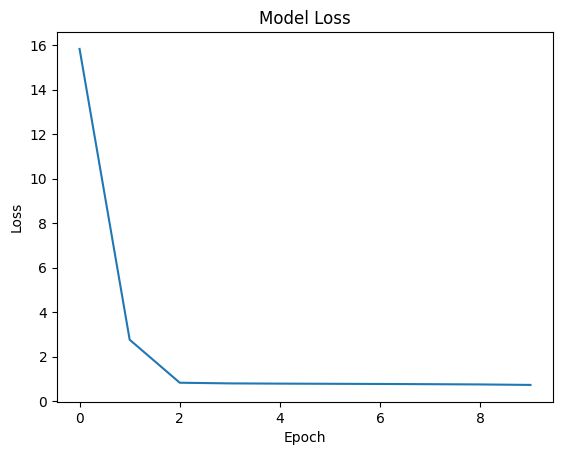

In [8]:
import matplotlib.pyplot as plt

# Plot training history (loss)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()